In [5]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

import collections

In [8]:
import pandas as pd 
import numpy as np 
import os 

import re

import nltk
# from konlpy.corpus import kobill

from collections import Counter
import math

## __한글 서체 지정하기__

In [6]:
# rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False

In [7]:
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [9]:
data1 = pd.read_csv("1.Sleep-Data.csv", encoding='utf-8')
data1

,타임스탬프,나이가 어떻게 되시나요?,성별이 어떻게 되시나요?,현재 어떤 신분이신가요?,수면과 관련하여 어려움을 겪으시나요?,스마트 워치를 사용하시나요?,스마트 워치를 차고 주무시나요?,수면 어플을 써보신 적이 있으신가요?,어떤 어플을 쓰셨나요?,어플을 사용하신 이유가 무엇인가요?,가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간),잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?,가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간).1,잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?.1
0,11.21.2021 22:45:59,33,남성,직장인,3,아니오,아니오,아니오,NaN,NaN,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다
1,11.22.2021 0:44:14,25,여성,직장인,4,아니오,아니오,아니오,NaN,NaN,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭"
2,11.22.2021 8:23:51,24,여성,학생,6,아니오,아니오,네,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,NaN,NaN
3,11.22.2021 15:11:45,29,여성,직장인,8,예,아니오,아니오,NaN,NaN,NaN,NaN,매일,수면음악듣기
4,11.22.2021 16:05:51,29,남성,직장인,8,예,예,아니오,NaN,NaN,NaN,NaN,마감이 많이 몰리는 월말 월초,일단 누워서 버텨봅니다ㅜ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1.4.2022 11:19:37,30,남성,직장인,4,아니오,아니오,아니오,NaN,NaN,NaN,NaN,매주중,편안한 수면 매트 교체
1262,1.4.2022 11:23:53,30,여성,직장인,8,예,아니오,아니오,NaN,NaN,NaN,NaN,언제나,유튜브 시청
1263,1.4.2022 20:20:49,22,여성,학생,7,아니오,아니오,아니오,NaN,NaN,NaN,NaN,"몸이 아플때, 방학기간때",속으로 숫자 세리거나 그냥 눈감고 가만히 있음
1264,1.7.2022 11:51:57,23,남성,학생,7,아니오,아니오,아니오,NaN,NaN,NaN,NaN,항상 필요하다,유튜브 보다가 눈이 감길때 잔다


In [12]:
data.isnull().sum()

타임스탬프                                       0
나이가 어떻게 되시나요?                               0
성별이 어떻게 되시나요?                               0
현재 어떤 신분이신가요?                               0
수면과 관련하여 어려움을 겪으시나요?                        0
스마트 워치를 사용하시나요?                             0
스마트 워치를 차고 주무시나요?                           0
수면 어플을 써보신 적이 있으신가요?                        0
어떤 어플을 쓰셨나요?                              917
어플을 사용하신 이유가 무엇인가요?                       917
가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간)      917
잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?                933
가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간).1    349
잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?.1              370
dtype: int64

## 나이 전처리: 숫자만 가져오기 

In [14]:
np.unique(data.iloc[:,1].values)

array(['10대', '12살', '13', '14', '15', '16', '17', '18', '19', '19세', '2',
       '20', '2001년생 21살입니다.', '20살', '20세', '21', '21(한국나이)', '21살',
       '21세', '21세 (만 20세)', '22', '22살', '22살 ', '22세', '23', '230',
       '23살', '23세', '24', '24살', '24세', '25', '25살', '25세', '26', '26살',
       '26살!', '26세', '27', '28', '28세', '29', '30', '31', '32', '33',
       '34', '35', '36', '39', '40', '44', '45', '46', '49', '49세', '50',
       '50대', '51', '51세', '52', '52세', '53', '53세', '54', '55', '56',
       '56세', '57', '59', '60', '61', '63', '64세', '65', '66', '67',
       '67세', '70', '만 19세', '만 20세', '만 21', '만 21세', '만 22', '만 22세',
       '만 24', '만 24세', '만 50세', '만23', '만24', '이윤정', '이재원', '최윤영', '허지은',
       '현재 만 19살입니다', '현재 만20세 ', '휘경동에 거주하고 있는 99년생, 23살 입니다'],
      dtype=object)

In [15]:
def find_number(x):
    numbers =  re.findall("\d+", x)
    for num in numbers:
        if int(num) < 100:
            return int(num)
    return None

## 중복되는 컬럼 합치기

In [19]:
x_list = []
y_list = []

for i in range(len(data)):
    x1, x2 = data.iloc[i,-4], data.iloc[i,-2] 
    y1, y2 = data.iloc[i,-3], data.iloc[i,-1] 
#     print(x1, x2)
#     print(y1, y2)
    
    if x1 == x1: # x1이 nan값인지 확인
        x_list.append(x1)
    else:
        x_list.append(x2)
    
    if y1 == y1: # x1이 nan값인지 확인
        y_list.append(y1)
    else:
        y_list.append(y2)        
        
#     break

In [20]:
data.iloc[:, -4] = x_list

In [21]:
data.iloc[:, -3] = y_list

In [23]:
data = data.drop([data.columns[-2], data.columns[-1]], axis=1)
data

,타임스탬프,나이가 어떻게 되시나요?,성별이 어떻게 되시나요?,현재 어떤 신분이신가요?,수면과 관련하여 어려움을 겪으시나요?,스마트 워치를 사용하시나요?,스마트 워치를 차고 주무시나요?,수면 어플을 써보신 적이 있으신가요?,어떤 어플을 쓰셨나요?,어플을 사용하신 이유가 무엇인가요?,가장 잠이 필요한 시기나 순간은 언제인가요? (ex. 시험 기간),잠을 잘 못 잘 때 어떤 방법으로 해결하시나요?
0,11.21.2021 22:45:59,33.0,남성,직장인,3,아니오,아니오,아니오,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다
1,11.22.2021 0:44:14,25.0,여성,직장인,4,아니오,아니오,아니오,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭"
2,11.22.2021 8:23:51,24.0,여성,학생,6,아니오,아니오,네,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다
3,11.22.2021 15:11:45,29.0,여성,직장인,8,예,아니오,아니오,NaN,NaN,매일,수면음악듣기
4,11.22.2021 16:05:51,29.0,남성,직장인,8,예,예,아니오,NaN,NaN,마감이 많이 몰리는 월말 월초,일단 누워서 버텨봅니다ㅜ
...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1.4.2022 11:19:37,30.0,남성,직장인,4,아니오,아니오,아니오,NaN,NaN,매주중,편안한 수면 매트 교체
1262,1.4.2022 11:23:53,30.0,여성,직장인,8,예,아니오,아니오,NaN,NaN,언제나,유튜브 시청
1263,1.4.2022 20:20:49,22.0,여성,학생,7,아니오,아니오,아니오,NaN,NaN,"몸이 아플때, 방학기간때",속으로 숫자 세리거나 그냥 눈감고 가만히 있음
1264,1.7.2022 11:51:57,23.0,남성,학생,7,아니오,아니오,아니오,NaN,NaN,항상 필요하다,유튜브 보다가 눈이 감길때 잔다


## __나이가 nan 값인 row는 삭제하기__

In [24]:
data = data.dropna(subset=['나이가 어떻게 되시나요?'])

## 어플 전처리 

In [28]:
new_columns = ['시간', '나이', '성별', '직업','수면장애여부', '스마트워치 사용여부', '수면시 스마스워치','어플사용여부', '어플종류', '어플사용이유',
 '잠 필요 시기', '수면장애 해결법']

In [29]:
data.columns = new_columns

In [30]:
data.head()

,시간,나이,성별,직업,수면장애여부,스마트워치 사용여부,수면시 스마스워치,어플사용여부,어플종류,어플사용이유,잠 필요 시기,수면장애 해결법
0,11.21.2021 22:45:59,33.0,남성,직장인,3,아니오,아니오,아니오,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다
1,11.22.2021 0:44:14,25.0,여성,직장인,4,아니오,아니오,아니오,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭"
2,11.22.2021 8:23:51,24.0,여성,학생,6,아니오,아니오,네,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다
3,11.22.2021 15:11:45,29.0,여성,직장인,8,예,아니오,아니오,NaN,NaN,매일,수면음악듣기
4,11.22.2021 16:05:51,29.0,남성,직장인,8,예,예,아니오,NaN,NaN,마감이 많이 몰리는 월말 월초,일단 누워서 버텨봅니다ㅜ


In [31]:
data['어플종류'].unique()

array([nan, '슬립사이클', '필로우', '없음', '삼성워치', 'Snoreclock', '예전에 스마트워치',
       '오토슬립', '자연소리 재생어플', 'sleep', 'sleep as android',
       'Do i snore and grind', '수면유도음악  및 빗소리등', '기억 안남',
       '기억안나는데..써봤어요..', '애플 건강 기본 앱', '애플 건강 앱 내 수면기능', '슬립워치',
       'SleepTime', '알람몬', '슬립지', '기억안남', '슬립스네일', '슬립모니터, 삼성 헬스 기본',
       '기억은 안나는데 수면 유도 asmr 앱', '애플 기본 건강어플', '슬립사이클, 슬립시어리', '명상앱',
       '삼성 헬스', '갤럭시 헬스 내장', '슬립사이클도 썼고, calm이라는 명상 어플로 수면유도명상 애용해요!',
       '유튜브', 'Sleep as Android', '스노어랩', '미밴드', 'Sleepytime', '모르겠어요',
       '아이폰 기본 수면 어플', '슬립모니터', '슬립타운', 'Sleep Time (수면 주기 스마트 알람 시계)',
       '잠 자는 시간 계산해주는 어플', '아이폰 건강앱', '기억이 안나용', 'Bettersleep', '슬립 모니터',
       '기억안남.', '기억이 안나요', '가민', 'Asmr  아무앱', '아이폰 기본 앱', '핸드폰 기본 수면 어플',
       '삼성헬스', '삼성헬스, 녹음', '기억이 안나요...', 'Asmr 어플(이름이 기억 안 나요...!)',
       '샤오미 미밴드에 있는 수면분석', '삼성헬스케어', '코골이 어플', '삼성헬스 슬립타운',
       '런타스틱 슬립베터(지금은 서비스 종료함)', '중복선택이 안돼 적습니다. (슬립사이클, 오토슬립)', '유튜브 채널',
       'Sleep Monitor', '삭제한 지 꽤 되어 어플 이름이 기억

In [34]:
def change_app_name(x) :
    if x in ['삼성헬스', '삼성 헬스', '갤럭시 헬스','삼성워치','스마트워치','아이폰','기본', '애플', '삼성' '애플워치' 'S헬스','수면트래커']:
        return '기본어플'
    elif x in  ['수면유도음악','Asmr']:
        return 'Asmr'
    elif x in  ['슬립모니터','슬립 모니터','Sleep Monitor']:
        return '슬립모니터'
    elif x in ['Sleepytime','Sleepy Time']:
        return '슬리피타임'
    elif x in ['calm blog','clam','calm']:
        return 'calm'
    elif x in ['sleep as android','Sleep as Android','sleel as android','Sleep as android']:
        return 'Sleep as android'
    elif x in ['기억', '모르겠어요']:
        return '까먹음'    
    else :
        return x

In [35]:
data['어플라벨'] = data['어플종류'].apply(change_app_name)

<ipython-input-35-85f4d2eb5d7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['어플라벨'] = data['어플종류'].apply(change_app_name)


In [36]:
data['어플라벨'].unique()

array([nan, '슬립사이클', '필로우', '없음', '기본어플', 'Snoreclock', '예전에 스마트워치',
       '오토슬립', '자연소리 재생어플', 'sleep', 'Sleep as android',
       'Do i snore and grind', '수면유도음악  및 빗소리등', '기억 안남',
       '기억안나는데..써봤어요..', '애플 건강 기본 앱', '애플 건강 앱 내 수면기능', '슬립워치',
       'SleepTime', '알람몬', '슬립지', '기억안남', '슬립스네일', '슬립모니터, 삼성 헬스 기본',
       '기억은 안나는데 수면 유도 asmr 앱', '애플 기본 건강어플', '슬립사이클, 슬립시어리', '명상앱',
       '갤럭시 헬스 내장', '슬립사이클도 썼고, calm이라는 명상 어플로 수면유도명상 애용해요!', '유튜브',
       '스노어랩', '미밴드', '슬리피타임', '까먹음', '아이폰 기본 수면 어플', '슬립모니터', '슬립타운',
       'Sleep Time (수면 주기 스마트 알람 시계)', '잠 자는 시간 계산해주는 어플', '아이폰 건강앱',
       '기억이 안나용', 'Bettersleep', '기억안남.', '기억이 안나요', '가민', 'Asmr  아무앱',
       '아이폰 기본 앱', '핸드폰 기본 수면 어플', '삼성헬스, 녹음', '기억이 안나요...',
       'Asmr 어플(이름이 기억 안 나요...!)', '샤오미 미밴드에 있는 수면분석', '삼성헬스케어', '코골이 어플',
       '삼성헬스 슬립타운', '런타스틱 슬립베터(지금은 서비스 종료함)',
       '중복선택이 안돼 적습니다. (슬립사이클, 오토슬립)', '유튜브 채널',
       '삭제한 지 꽤 되어 어플 이름이 기억이 안 남', '애플워치 수면앱(애플 건강앱 연동)', '워치 내 기본 어플',
       '트로스트', '핸드폰 기본 어플'

## __나이 별로 groupby__

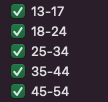

In [38]:
labels = ['13-17',
 '18-24',
 '25-34',
 '35-44',
 '45-54']

In [39]:
bins = [13, 17, 24, 34, 44, 54]

In [41]:
data['age group'] = pd.cut(data['나이'], bins, labels=labels)

<ipython-input-41-cfc934b1943e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age group'] = pd.cut(data['나이'], bins, labels=labels)


In [42]:
data

,시간,나이,성별,직업,수면장애여부,스마트워치 사용여부,수면시 스마스워치,어플사용여부,어플종류,어플사용이유,잠 필요 시기,수면장애 해결법,어플라벨,age group
0,11.21.2021 22:45:59,33.0,남성,직장인,3,아니오,아니오,아니오,NaN,NaN,근무 시간이 길 때,누워서 뒤척인다,NaN,25-34
1,11.22.2021 0:44:14,25.0,여성,직장인,4,아니오,아니오,아니오,NaN,NaN,숙취해소,"캐모마일 티 마시기, 온열안대 착용, 마사지 등 몸을 풀어주는 스트레칭",NaN,25-34
2,11.22.2021 8:23:51,24.0,여성,학생,6,아니오,아니오,네,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,슬립사이클,18-24
3,11.22.2021 15:11:45,29.0,여성,직장인,8,예,아니오,아니오,NaN,NaN,매일,수면음악듣기,NaN,25-34
4,11.22.2021 16:05:51,29.0,남성,직장인,8,예,예,아니오,NaN,NaN,마감이 많이 몰리는 월말 월초,일단 누워서 버텨봅니다ㅜ,NaN,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1.4.2022 11:19:37,30.0,남성,직장인,4,아니오,아니오,아니오,NaN,NaN,매주중,편안한 수면 매트 교체,NaN,25-34
1262,1.4.2022 11:23:53,30.0,여성,직장인,8,예,아니오,아니오,NaN,NaN,언제나,유튜브 시청,NaN,25-34
1263,1.4.2022 20:20:49,22.0,여성,학생,7,아니오,아니오,아니오,NaN,NaN,"몸이 아플때, 방학기간때",속으로 숫자 세리거나 그냥 눈감고 가만히 있음,NaN,18-24
1264,1.7.2022 11:51:57,23.0,남성,학생,7,아니오,아니오,아니오,NaN,NaN,항상 필요하다,유튜브 보다가 눈이 감길때 잔다,NaN,18-24


# 데이터 분석

## 설문조사 전반적인 데이터 파악 

In [43]:
data['나이']

0       33.0
1       25.0
2       24.0
3       29.0
4       29.0
        ... 
1261    30.0
1262    30.0
1263    22.0
1264    23.0
1265    22.0
Name: 나이, Length: 1261, dtype: float64

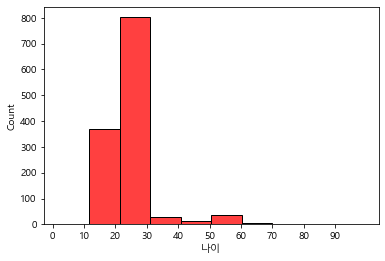

In [44]:
#seaborn으로 다른 컬럼 살펴보기.
sns.histplot(data = data, 
             bins=10,
             x= '나이',
             discrete = False,
             color = 'red')
#             kde=True)
plt.xticks(range(0,100,10))
plt.show()

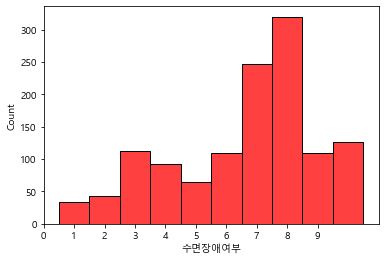

In [46]:
#seaborn으로 다른 컬럼 살펴보기.
sns.histplot(data = data, 
             bins=10,
             x= '수면장애여부',
             discrete = True,
             color = 'red')
plt.xticks(range(0,10,1))
plt.show()

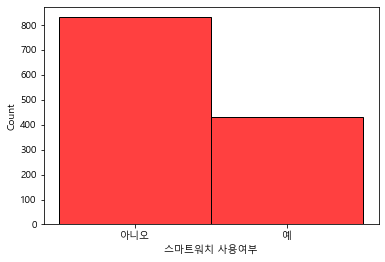

In [48]:
#seaborn으로 다른 컬럼 살펴보기.
sns.histplot(data = data, 
             bins=10,
             x= '스마트워치 사용여부',
             discrete = True,
             color = 'red')
# plt.xticks(range(0,10,1))
plt.show()

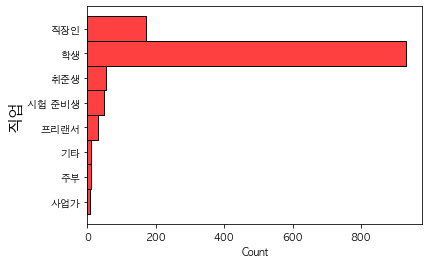

In [281]:
#seaborn으로 다른 컬럼 살펴보기.
fig = plt.gca()
sns.histplot(data = data, 
             bins=10,
             y= '직업',
             discrete = True,
             color = 'red')
fig.yaxis.label.set_size(16)
# plt.xticks(range(0,10,1))
plt.show()

In [49]:
data.groupby(['age group', '수면장애여부'])['수면장애여부'].count()

age group  수면장애여부
13-17      1           0
           2           0
           3           1
           4           0
           5           1
           6           0
           7           5
           8           1
           9           1
           10          0
18-24      1          20
           2          29
           3          81
           4          72
           5          39
           6          77
           7         159
           8         224
           9          80
           10         83
25-34      1           8
           2           9
           3          24
           4          16
           5          15
           6          21
           7          75
           8          85
           9          25
           10         40
35-44      1           0
           2           0
           3           0
           4           1
           5           2
           6           2
           7           3
           8           2
           9           0
       

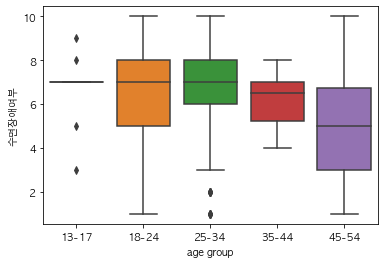

In [60]:
sns.boxplot(data = data, x = 'age group', y = '수면장애여부')
plt.show()

In [234]:
?sns.boxplot

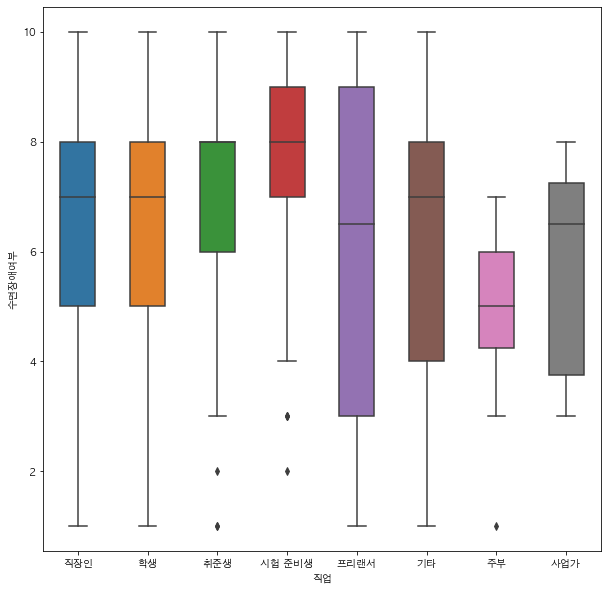

In [241]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(data = data, x = '직업', y = '수면장애여부', width=0.5)
plt.show()

나이대가 올라갈 수록 수면장애여부가 낮아진다

## 스마트워치 사용여부

In [65]:
def yes_or_no_to_numeric(x):
    if x == '예':
        return 1
    if x == '아니오':
        return 0 

In [67]:
data['스마트워치 사용여부']

0       아니오
1       아니오
2       아니오
3         예
4         예
       ... 
1261    아니오
1262      예
1263    아니오
1264    아니오
1265      예
Name: 스마트워치 사용여부, Length: 1261, dtype: object

In [69]:
data['스마트워치 사용여부'] = data['스마트워치 사용여부'].apply(yes_or_no_to_numeric)

/var/folders/8r/zqvjdcfd6896s3d9mqw4bkvh0000gn/T/ipykernel_11386/1325695209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['스마트워치 사용여부'] = data['스마트워치 사용여부'].apply(yes_or_no_to_numeric)


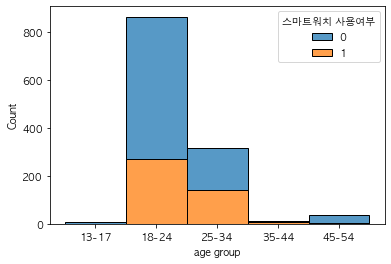

In [80]:
sns.histplot(data = data, 
            x= 'age group',
            discrete = True,
            hue = '스마트워치 사용여부',
             multiple = 'stack'
            )
# plt.yticks(range(0,600,50))
plt.show()

In [79]:
data.groupby(['age group', '스마트워치 사용여부'])['스마트워치 사용여부'].count()

age group  스마트워치 사용여부
13-17      0               8
           1               1
18-24      0             592
           1             272
25-34      0             176
           1             142
35-44      0               3
           1               7
45-54      0              35
           1               3
Name: 스마트워치 사용여부, dtype: int64

35-44를 제외하고는 전 연령에서 스마트워치를 사용하지 않는 비율이 높음. (35-44도 표본이 너무 적음) 

## 수면시 스마트워치

In [84]:
data['수면시 스마스워치']

0       아니오
1       아니오
2       아니오
3       아니오
4         예
       ... 
1261    아니오
1262    아니오
1263    아니오
1264    아니오
1265      예
Name: 수면시 스마스워치, Length: 1261, dtype: object

In [85]:
data['수면시 스마스워치'] = data['수면시 스마스워치'].apply(yes_or_no_to_numeric)

/var/folders/8r/zqvjdcfd6896s3d9mqw4bkvh0000gn/T/ipykernel_11386/2434992041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['수면시 스마스워치'] = data['수면시 스마스워치'].apply(yes_or_no_to_numeric)


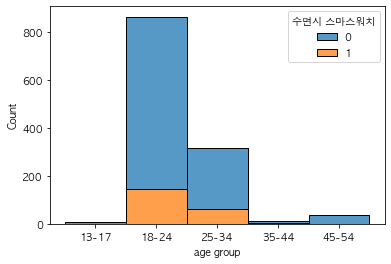

In [87]:
sns.histplot(data = data, 
            x= 'age group',
            discrete = True,
            hue = '수면시 스마스워치',
             multiple = 'stack'
            )
# plt.yticks(range(0,600,50))
plt.show()

## 어플 사용 여부

In [105]:
data['어플사용여부']

0       아니오
1       아니오
2         네
3       아니오
4       아니오
       ... 
1261    아니오
1262    아니오
1263    아니오
1264    아니오
1265      네
Name: 어플사용여부, Length: 1261, dtype: object

In [106]:
def yes_or_no_to_numeric2(x):
    if x == '네':
        return 1
    if x == '아니오':
        return 0 

In [107]:
data['어플사용여부'] = data['어플사용여부'].apply(yes_or_no_to_numeric2)

/var/folders/8r/zqvjdcfd6896s3d9mqw4bkvh0000gn/T/ipykernel_11386/2985826485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['어플사용여부'] = data['어플사용여부'].apply(yes_or_no_to_numeric2)


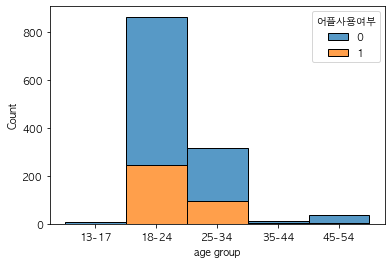

In [108]:
sns.histplot(data = data, 
            x= 'age group',
            discrete = True,
            hue = '어플사용여부',
             multiple = 'stack'
            )
# plt.yticks(range(0,600,50))
plt.show()

In [109]:
data.groupby(['age group', '어플사용여부'])['어플사용여부'].count()

age group  어플사용여부
13-17      0           8
           1           1
18-24      0         620
           1         244
25-34      0         224
           1          94
35-44      0           5
           1           5
45-54      0          35
           1           3
Name: 어플사용여부, dtype: int64

## 어플사용이유

In [112]:
data.groupby(['age group', '어플사용이유'])['어플사용이유'].count()

age group  어플사용이유                                  
13-17      수면 모니터링                                     1
           수면 모니터링, 수면 분석 리포트                          0
           수면 모니터링, 수면 분석 리포트, 수면 유도                   0
           수면 모니터링, 수면 분석 리포트, 수면 유도, 코골이, 이갈이 등 녹음    0
           수면 모니터링, 수면 분석 리포트, 코골이, 이갈이 등 녹음           0
                                                      ..
45-54      알람, 수면 분석 리포트, 수면 유도                        0
           알람, 수면 분석 리포트, 코골이, 이갈이 등 녹음                0
           알람, 수면 유도                                   0
           알람, 코골이, 이갈이 등 녹음                           0
           코골이, 이갈이 등 녹음                               0
Name: 어플사용이유, Length: 120, dtype: int64

In [308]:
age_group = '25-34'

In [309]:
def split_reason(x):
    if x!=x:
        return x
    else:
        return x.split(', ')
        

In [310]:
data['어플사용이유_split'] = data['어플사용이유'].apply(split_reason)

/var/folders/8r/zqvjdcfd6896s3d9mqw4bkvh0000gn/T/ipykernel_11386/1205459457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['어플사용이유_split'] = data['어플사용이유'].apply(split_reason)


In [311]:
data['어플사용이유_split'].head()

0          NaN
1          NaN
2    [수면 모니터링]
3          NaN
4          NaN
Name: 어플사용이유_split, dtype: object

In [312]:
def count_reason(x):
    if x!=x:
        return x
    else:
        return collections.Counter(x)
        

In [314]:
reason_dict = dict()

In [315]:
reason_list = ['수면 모니터링', '수면 분석 리포트', '수면 유도' ,'코골이, 이갈이 등 녹음','알람']

for x in reason_list:
    reason_dict[x] = 0

In [316]:
def reason_sum(x):
    if x!=x:
        return x
    else:
        keys = x.keys()
        for key in keys:
            try:
                reason_dict[key] += x[key] 
            except:
                reason_dict[key] = x[key]

In [317]:
data[data['age group'] == age_group]['어플사용이유_split'].apply(count_reason).apply(reason_sum)

0      NaN
1      NaN
3      NaN
4      NaN
5      NaN
        ..
1241   NaN
1250   NaN
1260   NaN
1261   NaN
1262   NaN
Name: 어플사용이유_split, Length: 318, dtype: float64

In [318]:
reason_dict

{'수면 모니터링': 66,
 '수면 분석 리포트': 49,
 '수면 유도': 14,
 '코골이, 이갈이 등 녹음': 0,
 '알람': 39,
 '코골이': 17,
 '이갈이 등 녹음': 17}

In [319]:
reason_dict['코골이, 이갈이 등 녹음'] += reason_dict['코골이']

In [320]:
del reason_dict['코골이']

In [321]:
del reason_dict['이갈이 등 녹음']

In [322]:
reason_dict

{'수면 모니터링': 66, '수면 분석 리포트': 49, '수면 유도': 14, '코골이, 이갈이 등 녹음': 17, '알람': 39}

In [323]:
group_names = list(reason_dict.keys())
group_sizes = list(reason_dict.values())
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral', 'red', 'blue']
group_explodes = (0.05, 0.05, 0.1, 0.1, 0.1) # explode 1st slice  #0.1로 간격을 부여. 0은 간격 없는 것. default = 0.

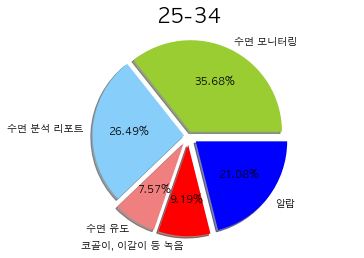

In [324]:
plt.pie(group_sizes, 
        explode=group_explodes, # pie 간의 간격 지정, default : pie 사이 간격 무
        labels=group_names, 
        colors=group_colors, 
        autopct='%1.2f%%', # 우리가 부여한 숫자가 알아서 퍼센트로 변함. 그 퍼센트의 소수점 자릿수 지정 
        #소숫점 지정할 때는 정수부분은 보통 1을 씀.
        shadow=True, # 입체적으로 표현 가능
        textprops={'fontsize': 10}) # text font size

plt.axis('equal') # x축과 y축 길이 동일하게 지정, 원 모양
plt.title(age_group, fontsize=20)
plt.show()  

## __워드 클라우드 시각화__

In [247]:
np.unique(data['수면장애여부'], return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 33,  43, 113,  93,  65, 110, 247, 320, 110, 127]))

In [252]:
need_sleep_data = data[data['수면장애여부']>=6]
need_sleep_data

,시간,나이,성별,직업,수면장애여부,스마트워치 사용여부,수면시 스마스워치,어플사용여부,어플종류,어플사용이유,잠 필요 시기,수면장애 해결법,어플라벨,age group,어플사용이유_split
2,11.22.2021 8:23:51,24.0,여성,학생,6,0,0,1,슬립사이클,수면 모니터링,"다음날 일정이 많고 몸을 많이 쓸 때, 시험 기간",잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다,슬립사이클,18-24,[수면 모니터링]
3,11.22.2021 15:11:45,29.0,여성,직장인,8,1,0,0,NaN,NaN,매일,수면음악듣기,NaN,25-34,NaN
4,11.22.2021 16:05:51,29.0,남성,직장인,8,1,1,0,NaN,NaN,마감이 많이 몰리는 월말 월초,일단 누워서 버텨봅니다ㅜ,NaN,25-34,NaN
6,11.22.2021 20:17:36,15.0,남성,학생,7,0,0,0,NaN,NaN,지금,피곤하게 만든다,NaN,13-17,NaN
7,11.22.2021 21:17:03,27.0,여성,직장인,8,1,0,1,필로우,"수면 모니터링, 코골이, 이갈이 등 녹음",평소,잠이 올 때까지 핸드폰을 한다.,필로우,25-34,"[수면 모니터링, 코골이, 이갈이 등 녹음]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,12.31.2021 13:49:04,22.0,여성,학생,7,0,0,0,NaN,NaN,요새 코로나 시국 때문에 학교에서 대면수업을 할 일이 없어서 새벽에 늦게자고 낮에 ...,딱히 뭘 해도 잠이 안와서 잠들 때까지 그냥 억지로 눈감고 버팁니다...ㅎ,NaN,18-24,NaN
1260,1.2.2022 22:19:41,31.0,남성,학생,7,1,1,0,NaN,NaN,평상시,커튼,NaN,25-34,NaN
1262,1.4.2022 11:23:53,30.0,여성,직장인,8,1,0,0,NaN,NaN,언제나,유튜브 시청,NaN,25-34,NaN
1263,1.4.2022 20:20:49,22.0,여성,학생,7,0,0,0,NaN,NaN,"몸이 아플때, 방학기간때",속으로 숫자 세리거나 그냥 눈감고 가만히 있음,NaN,18-24,NaN


In [257]:
from konlpy.tag import Okt

In [254]:
need_sleep_data.loc[:, '수면장애 해결법'].astype(str)

2                 잠이 안오면 어떤 방법을 써도 효과가 없어서 그냥 샙니다
3                                          수면음악듣기
4                                   일단 누워서 버텨봅니다ㅜ
6                                        피곤하게 만든다
7                               잠이 올 때까지 핸드폰을 한다.
                          ...                    
1259    딱히 뭘 해도 잠이 안와서 잠들 때까지 그냥 억지로 눈감고 버팁니다...ㅎ
1260                                          커튼 
1262                                       유튜브 시청
1263                    속으로 숫자 세리거나 그냥 눈감고 가만히 있음
1264                            유튜브 보다가 눈이 감길때 잔다
Name: 수면장애 해결법, Length: 914, dtype: object

In [1]:
t = Okt()

NameError: name 'Okt' is not defined

In [259]:
word_df = need_sleep_data.loc[:, '수면장애 해결법'].apply(lambda x: t.nouns(str(x)))

In [260]:
word_list = []
for x in word_df:
    word_list += x
    

In [264]:
len(word_list)

2760

In [263]:
stop_words = "때 함 것 잠 그냥"
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
result = [word for word in word_list if not word in stop_words]

In [272]:
counts = Counter(result)
tags = counts.most_common(100)

In [277]:
word_df

2              [잠, 방법, 효과, 그냥]
3                 [수면, 음악, 듣기]
4                         [일단]
6                           []
7                  [잠, 때, 핸드폰]
                 ...          
1259    [뭘, 해도, 잠, 때, 그냥, 억지로]
1260                      [커튼]
1262                 [유튜브, 시청]
1263       [속, 숫자, 세리, 거나, 그냥]
1264               [유튜브, 눈, 때]
Name: 수면장애 해결법, Length: 914, dtype: object

In [273]:
tags

[('유튜브', 125),
 ('수면', 98),
 ('눈', 84),
 ('유도', 60),
 ('감고', 58),
 ('영상', 53),
 ('음악', 46),
 ('계속', 42),
 ('핸드폰', 40),
 ('듣기', 38),
 ('노력', 28),
 ('밤', 28),
 ('생각', 25),
 ('노래', 24),
 ('명상', 24),
 ('낮잠', 24),
 ('휴대폰', 24),
 ('커피', 22),
 ('등', 21),
 ('운동', 21),
 ('제', 20),
 ('틀', 20),
 ('시청', 20),
 ('거나', 18),
 ('술', 18),
 ('몸', 18),
 ('해결', 18),
 ('폰', 18),
 ('쪽잠', 17),
 ('억지로', 16),
 ('뒤척', 16),
 ('자기', 16),
 ('날', 15),
 ('책', 15),
 ('다른', 14),
 ('방법', 13),
 ('다음', 13),
 ('보기', 13),
 ('소리', 13),
 ('일어나서', 13),
 ('안', 13),
 ('안대', 12),
 ('최대한', 12),
 ('물', 12),
 ('경우', 12),
 ('일', 12),
 ('포기', 11),
 ('못', 11),
 ('자세', 10),
 ('마시기', 10),
 ('시간', 10),
 ('침대', 9),
 ('하루', 9),
 ('사용', 9),
 ('밤샘', 9),
 ('복용', 9),
 ('자', 8),
 ('카페인', 8),
 ('섭취', 8),
 ('호흡', 8),
 ('일단', 7),
 ('감상', 7),
 ('넷플릭스', 7),
 ('무작정', 7),
 ('다시', 7),
 ('해', 7),
 ('일찍', 6),
 ('자지', 6),
 ('오디오북', 6),
 ('후', 6),
 ('더', 6),
 ('약', 6),
 ('자고', 6),
 ('보고', 6),
 ('공부', 6),
 ('심호흡', 6),
 ('거', 6),
 ('법', 6),
 ('우유', 6),
 ('스트레

In [274]:
font = '/Library/Fonts/NanumSquareOTFLight.otf'

In [275]:
from wordcloud import WordCloud
word_cloud = WordCloud(font_path=font,background_color='black',max_font_size=400, colormap='prism').generate_from_frequencies(dict(tags))

(-0.5, 399.5, 199.5, -0.5)

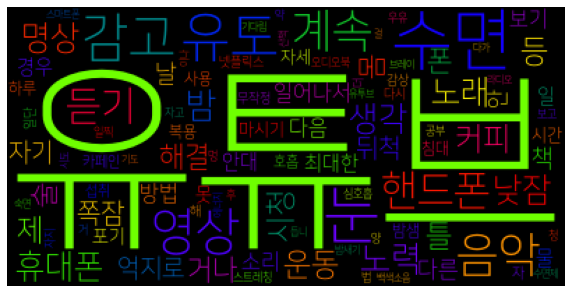

In [276]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')

In [288]:
def check_word(x):
    for word in x:
        if word in ['유튜브', '수면', '눈', '유도']:
            return True
    return False

In [289]:
# 유튜브, 수면, 눈, 유도 어떤 문장들이 있는지 보기 
new_idx = word_df.apply(check_word)

In [294]:
need_sleep_data[new_idx]['수면장애 해결법'].to_csv("수면장애해결법.csv", encoding='utf-8')